# 1. Add one more hidden layer to autoencoder

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor of 24.5 assuming the input is 784 floats

# Define the input placeholder
input_img = Input(shape=(784,))

# Add the hidden layer
hidden_layer = Dense(128, activation='relu')(input_img)

# Encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hidden_layer)

# Lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# Map an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Map an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6945 - val_loss: 0.6943
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6938 - val_loss: 0.6937


## 2.Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
# 2.1 Also, visualize the same test data before reconstruction using Matplotlib

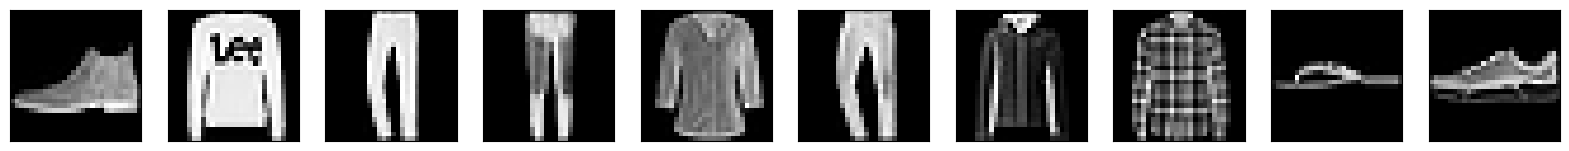

In [5]:
import matplotlib.pyplot as plt

# Select a few images from the test set to visualize
num_images = 10
selected_images = x_test[:num_images]

# Plot the original images
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# 2.2 Do the prediction on the test data and then visualize one of the reconstructed version of that test dat

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


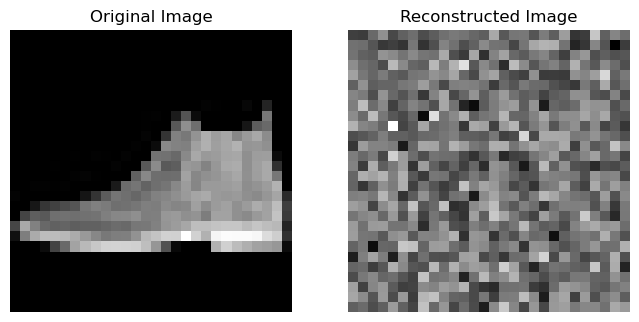

In [6]:
# Predict on the test data
reconstructed_images = autoencoder.predict(x_test)

# Visualize one of the reconstructed images
image_index = 0  # Index of the image to visualize
original_image = x_test[image_index].reshape(28, 28)
reconstructed_image = reconstructed_images[image_index].reshape(28, 28)

# Plot the original and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


# 3. Repeat the question 2 on the denoisening autoencoder

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6974 - val_loss: 0.6972
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6971 - val_loss: 0.6968
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6967 - val_loss: 0.6965
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6963 - val_loss: 0.6962
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6960 - val_loss: 0.6958
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6957 - val_loss: 0.6955
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6954 - val_loss: 0.6952
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6951 - val_loss: 0.6949
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6948 - val_loss: 0.6946
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6945 - val_loss: 0.6943


# 3.1 visualize the same test data before reconstruction using Matplotlib

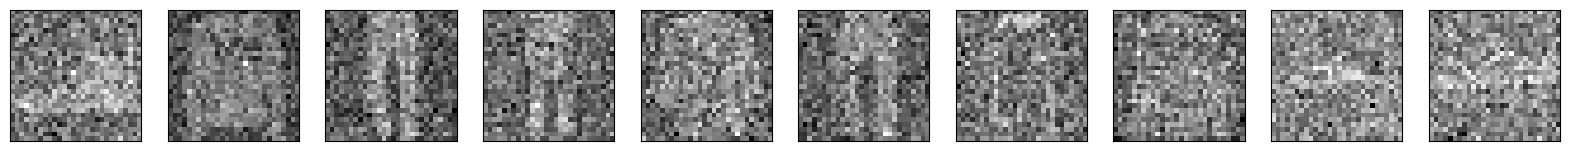

In [8]:
import matplotlib.pyplot as plt

# Select a few noisy images from the test set to visualize
num_images = 10
selected_noisy_images = x_test_noisy[:num_images]

# Plot the noisy images
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Noisy image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(selected_noisy_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# 3.2 Do the prediction on the test data and then visualize one of the reconstructed version of that test dat

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step


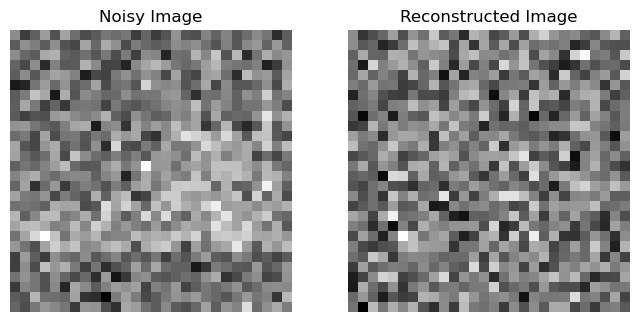

In [9]:
# Predict on the noisy test data
reconstructed_images = autoencoder.predict(x_test_noisy)

# Visualize one of the reconstructed images
image_index = 0  # Index of the image to visualize
noisy_image = x_test_noisy[image_index].reshape(28, 28)
reconstructed_image = reconstructed_images[image_index].reshape(28, 28)

# Plot the noisy and reconstructed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


# 4. Plot loss and accuracy using the history object

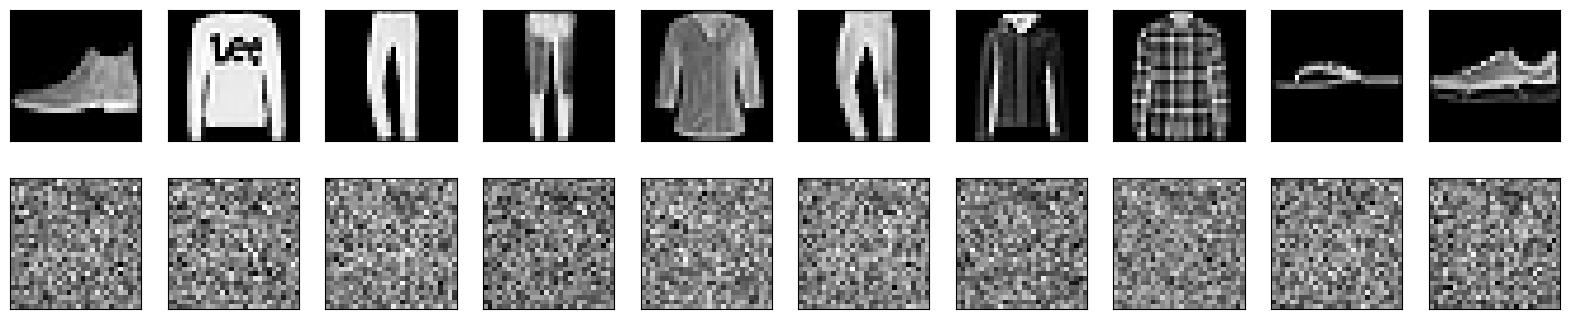

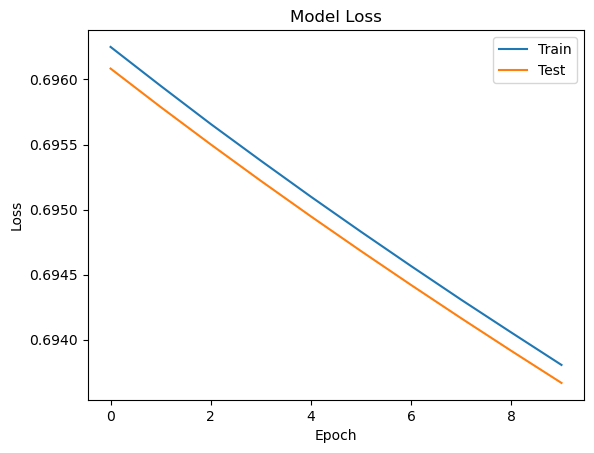

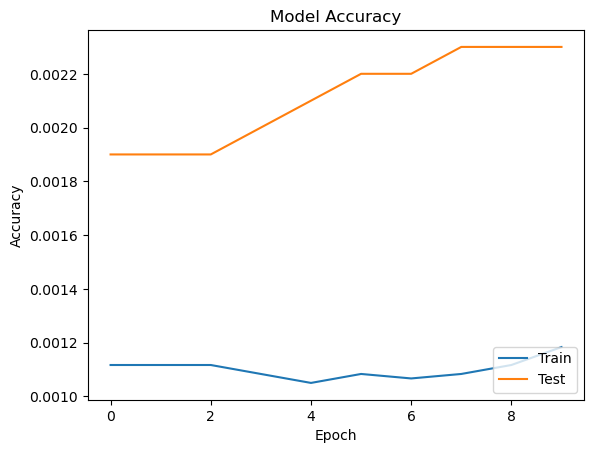

In [18]:
# Visualize one of the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()